Date: 20 February 2018, Version: 4.4.1
..........................................
            Adj Close
Date                 
2017-01-03        NaN
2017-01-04  -0.001119
2017-01-05   0.005085
2017-01-06   0.011148
2017-01-09   0.009159
2017-01-10   0.001008
2017-01-11   0.005373
2017-01-12  -0.004175
2017-01-13  -0.001761
2017-01-17   0.008065
2017-01-18  -0.000083
2017-01-19  -0.001750
2017-01-20   0.001837
2017-01-23   0.000667
2017-01-24  -0.000916
2017-01-25   0.015921
2017-01-26   0.000492
2017-01-27   0.000082
2017-01-30  -0.002624
2017-01-31  -0.002302
2017-02-01   0.060981
2017-02-02  -0.001709
2017-02-03   0.004279
2017-02-06   0.009374
2017-02-07   0.009517
2017-02-08   0.003878
2017-02-09   0.007226
2017-02-10  -0.002265
2017-02-13   0.008855
2017-02-14   0.012979
...               ...
2018-01-05   0.011385
2018-01-08  -0.003714
2018-01-09  -0.000115
2018-01-10  -0.000229
2018-01-11   0.005680
2018-01-12   0.010326
2018-01-16  -0.005082
2018-01-17   0.016516
2018-01-18   0.0

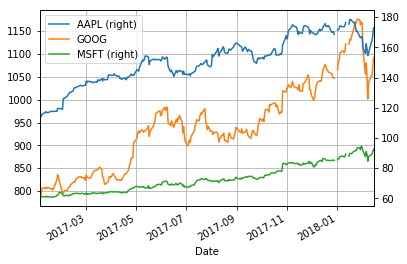

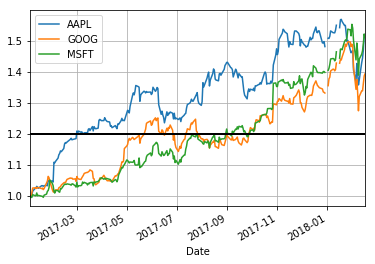

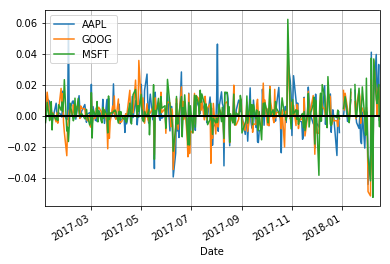

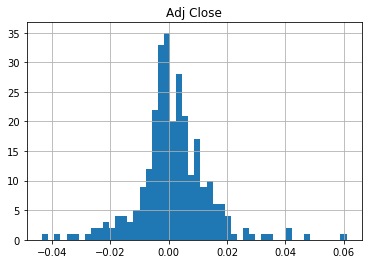

        Adj Close
count  283.000000
mean     0.001541
std      0.012149
min     -0.043390
25%     -0.004011
50%      0.000492
75%      0.007223
max      0.060981
                          Open         High          Low        Close  \
Ticker Date                                                             
AAPL   2013-12-31    79.167145    80.182854    79.142860    80.145714   
       2014-01-02    79.382858    79.575714    78.860001    79.018570   
       2014-01-03    78.980003    79.099998    77.204285    77.282860   
       2014-01-06    76.778572    78.114288    76.228569    77.704285   
       2014-01-07    77.760002    77.994286    76.845711    77.148575   
       2014-01-08    76.972855    77.937141    76.955711    77.637146   
       2014-01-09    78.114288    78.122856    76.478569    76.645714   
       2014-01-10    77.118568    77.257141    75.872856    76.134285   
       2014-01-13    75.701431    77.500000    75.697144    76.532860   
       2014-01-14    76.888573    7

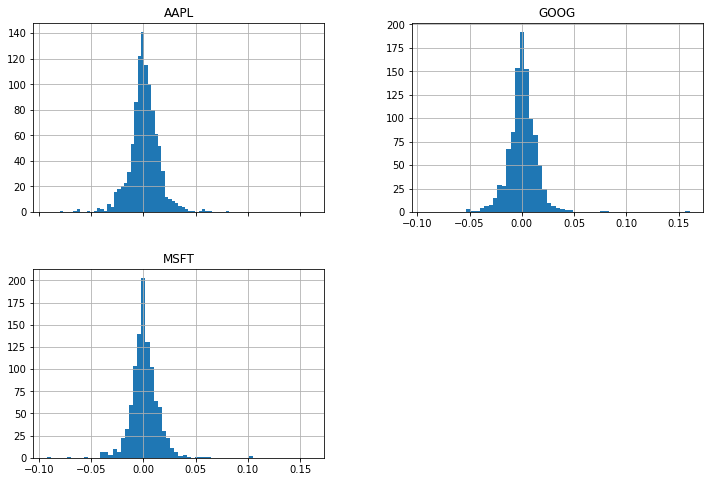

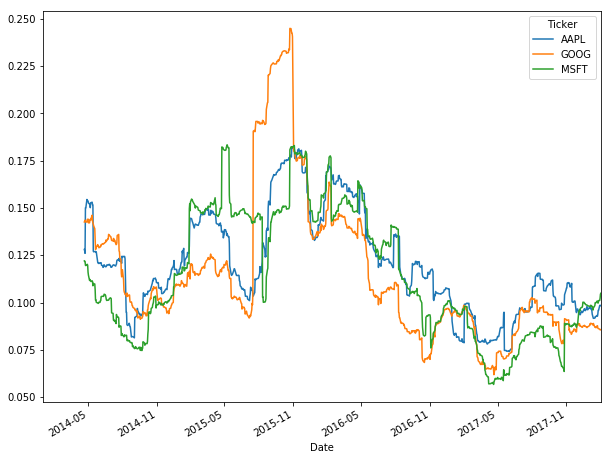

.......................................................
.............................................


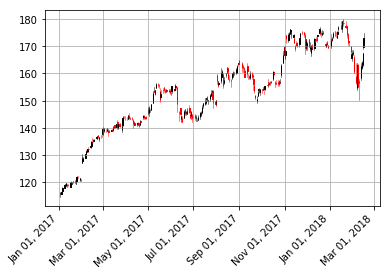

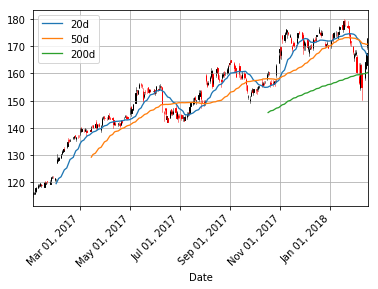

..............................................................


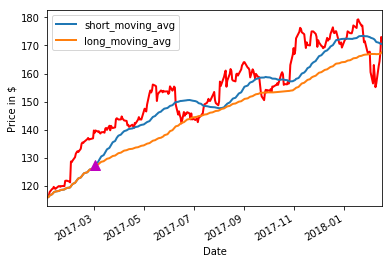

In [28]:
print ('Date: 20 February 2018, Version: 4.4.1')
print ".........................................."
'''analyzing stock market data'''
import matplotlib.pyplot as plt
import pandas as pd            #pandas modules provides fast, flexible, and expressive data structures
from pandas_datareader import data as web # Package and modules for importing data from web
import datetime 
# stock prices over the past year, starting at January 1, 2017
start = datetime.datetime(2017,1,1)   #Function giving a combination of a date(yyyy/mm/dd) and a time.
end = datetime.date.today()
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)  # DataReader extracts data from Internet into a pandas DataFrame
type(apple)
apple.head()  




'''Dataframe creating stock exchanges data of Microsoft, Google,Apple together'''
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"],
                     })
 
stocks.head()
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)



'''Given graph shows how profitable each stock was since the beginning of the period. 
#Furthermore, we see that these stocks are highly correlated.
#return=(price at time t)/(price at the beginning of time period)
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result'''

stock_return_price = stocks.apply(lambda x: x / x[0])
stock_return_price.head()
stock_return_price.plot(grid = True).axhline(y = 1.2, color = "black", lw = 2)


# change=log(price at time t)-log(price at time t-1)
import numpy as np
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)




'''daily percentage change doesnâ€™t take into account dividends and other factors and represents the amount 
of percentage change in the value of a stock over a single day of trading. '''
daily_close = apple[['Adj Close']]

# Daily returns-daily percentage change is easily calculated using pct_change() function
pct_change = daily_close.pct_change()

# Replace NA values with 0
print(pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns)




# Plot histogram for the distribution of `daily_pct_c`
pct_change.hist(bins=50)
plt.show()

# Summary statistics Description
print(pct_change.describe())




'''the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one big DataFrame'''

import pandas_datareader as pdr
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'GOOG']
all_data = get(tickers, datetime.datetime(2014, 1, 1), datetime.datetime(2018, 2, 1))
print all_data


# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
pct_change = daily_close_px.pct_change()
#histograms
pct_change.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()



'''Volatility in stock exchanges'''
# minumum of periods to consider 
min_periods = 75 

# volatility
volatility =pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
volatility.plot(figsize=(10, 8))

# Show the plot
plt.show()

print "......................................................."
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show() 
print "............................................."


'''candlestick graphs...'''
import pandas as pd
from pandas_datareader import data as web # Package and modules for importing data from web
import datetime
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY,date2num
from matplotlib.finance import candlestick_ohlc
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      
 
    # Creating a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]] #loc- label-location based indexer for selection by label
    if (type(stick) == str):   #comparing the type of candlesticks with the suffix day
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:     #plotting the data according to different indexes being retrieved in plotdata
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5        #assigning the stick according to calendar dimensions as week, month , year
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")    #groupby is used for grouping according to the sticks type
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()      #setting the figure, axis parameters of subplots
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('400 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)     #setting the axis with major days in a week
        ax.xaxis.set_minor_locator(alldays)     #setting the axis with minor days in a week
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plotting series ( moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:      #checking the type of series as list datatype
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)      #plot the graph of moving average corrosponding to different rolling windows 
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
pandas_candlestick_ohlc(apple)     #function call


#setting the different windows according to different sizes and index
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Close"].rolling(window = 200, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2017-01-01':'2018-02-20',:], otherseries = ["20d", "50d", "200d"])


print ".............................................................."
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=apple.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_moving_avg'] = apple['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_moving_avg'] = apple['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_moving_avg'][short_window:] 
                                            > signals['long_moving_avg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['trading_positions'] = signals['signal'].diff()

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
axis = fig.add_subplot(111,  ylabel='Price in $')

# Ploting the closing price
apple['Close'].plot(ax=axis, color='r', lw=2.)

# Ploting the short and long moving averages
signals[['short_moving_avg', 'long_moving_avg']].plot(ax=axis, lw=2.)

# Plot the buy signals
axis.plot(signals.loc[signals.trading_positions == 1.0].index, 
         signals.short_moving_avg[signals.trading_positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
axis.plot(signals.loc[signals.trading_positions == -1.0].index, 
         signals.short_moving_avg[signals.trading_positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()